# Notebook on Datetime (Answers)

In [90]:
# Run this cell first to import everything we'll need.
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from datascience import *

Run the block of code below. Notice how the "Date" column is not in a simple format. 

Optional: Read this link (https://www.w3schools.com/python/python_datetime.asp) for more information.

In [96]:
fullDataset = Table.read_table("Greenland_domain_mean_1979_2021_v3.csv").take(range(8000))
fullDataset.show(5)

Date,LW_down,SW_down,T2m,Nao,GBI
1979-01-01,224.463,25.8776,263.745,-0.788,5221.53
1979-01-02,225.811,25.446,262.863,-0.838,5198.18
1979-01-03,226.665,25.318,263.099,-0.538,5208.06
1979-01-04,226.454,24.9229,263.039,-0.225,5218.68
1979-01-05,227.341,24.8668,263.215,0.242,5215.2


For this analysis, our goal is to convert the values in "Date" into the days that have passed since 1979-01-01. To start, let's look at comparing 2 known dates.

Find the number of days between the two dates below (Hint: Use the .days method to convert the timedelta datatype into ints.)

In [97]:
example1 = datetime.date(2021, 1, 1)
example2 = datetime.date(2022, 1, 1)
daysBetween = (example2 - example1).days
daysBetween

365

Next, write a function "cleanDates" that gives the number of days that have passed since January 1, 1979. The input will be given in the same way as the "Date" column (meaning "YYYY-MM-DD")

Also, I know this will just give consecutive numbers, and it would be really easy to replicate with a for loop. However, some data might have missing values and so practicing this way now is good preparation.

In [98]:
def cleanDates(inputDate):
    parts = inputDate.split("-")
    year1 = int(parts[0])
    month1 = int(parts[1])
    day1 = int(parts[2])
    return (datetime.date(year1, month1, day1) - datetime.date(1979, 1, 1)).days

cleanDates("2001-12-25")

8394

In [103]:
daysSinceStart = fullDataset.apply(cleanDates, 0)
daysSinceStart

array([   0,    1,    2, ..., 7997, 7998, 7999])

Finally, write code that makes a scatter plot using the daysSinceStart array as well as any column from the Greenland dataset (besides Date and Nao). Do you notice any connections?

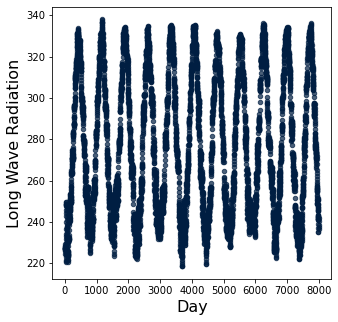

In [102]:
plotThis = Table().with_columns("Day", daysSinceStart, "Long Wave Radiation", fullDataset.column("LW_down"))
plotThis.scatter("Day", "Long Wave Radiation")